In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# importing os module 
import os 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Load in data
os.chdir("//content//gdrive//My Drive//PhD casting project//Summary files")

filename='DTAdatatrimtrain.csv'
filename1='DTAdatatrimtest.csv'

data = pd.read_csv(filename)
data.head()
data.info()
tdata = pd.read_csv(filename1)
#F_MC=data['Fraction MC E1']

## Define Data of Interest
labels=data['Sample ID']
liquidus=data['Liquidus']
tliquidus=tdata['Liquidus']
comp=data.loc[:,'C':'Fe']
tcomp=tdata.loc[:,'C':'Fe']
print(comp)
print(liquidus)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
Sample ID    27 non-null object
C            27 non-null float64
Cr           27 non-null float64
Ni           27 non-null float64
Mn           27 non-null float64
Si           27 non-null float64
Mo           27 non-null float64
Nb           27 non-null float64
W            27 non-null float64
Ti           27 non-null float64
Zr           27 non-null float6

In [0]:
# %% Visualize Data
plt.figure(figsize=(10,6))
plt.scatter(data['C'],data['Liquidus'])
plt.xlabel('Concentration (wt.%)')
plt.ylabel('Temperature (C)')
plt.show()

[0.01670288 0.08567572 0.00881047 0.03942633 0.13336387 0.02787641
 0.18501999 0.01289004 0.00702579 0.00138209 0.4818264 ]
[1368.957      1352.84250002 1367.56650001]
0    1362.80
1    1357.85
2    1363.90
Name: Liquidus, dtype: float64


Text(0, 0.5, 'Predicted Temperature (C)')

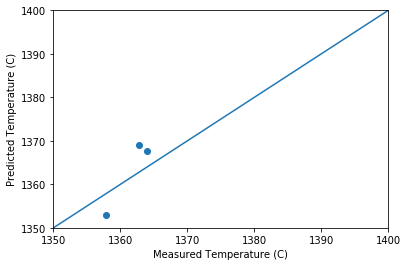

In [3]:
  # Trees!

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X=comp
y=liquidus
#X, y = make_regression(n_features=4, n_informative=2,
#                       random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=20, random_state=0,
                             n_estimators=100)

regr.fit(X, y)  

print(regr.feature_importances_)

print(regr.predict(tcomp))
print(tliquidus)

plt.scatter(tliquidus,regr.predict(tcomp))
plt.plot([1350,1400],[1350,1400])
plt.ylim(1350,1400)
plt.xlim(1350,1400)
plt.xlabel('Measured Temperature (C)')
plt.ylabel('Predicted Temperature (C)')